In [ ]:
"""Principal component analysis (PCA) is a popular technique for analyzing large datasets 
containing a high number of dimensions/features per observation, 
increasing the interpretability of data while preserving the maximum amount of information,
and enabling the visualization of multidimensional data. 
Formally, PCA is a statistical technique for reducing the dimensionality of a dataset. 
This is accomplished by linearly transforming the data 
into a new coordinate system where (most of) the variation in the data 
can be described with fewer dimensions than the initial data. 


PCA isolates the statistical return drivers of a portfolio. 
These drivers are called “alpha factors” (or just factors) because they create 
returns that are not explained by a benchmark. 
Quants use factors in trading strategies. First, they isolate the components. 
Then they buy the stocks with the largest exposure to a factor and 
sell the stocks with the smallest exposure to a factor. 
Today you’ll learn how to do this in Python.
"""

In [1]:
# Imports + Data
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

from openbb_terminal.sdk import openbb
import matplotlib.pyplot as plt

In [2]:
# Determines the Portfolio
symbols = [
    'IBM',
    'MSFT',
    'META',
    'INTC',
    'NEM',
    'AU',
    'AEM',
    'GFI'
]

data = openbb.economy.index(symbols, start_date = "2020-01-01", end_date = "2022-11-30")

portfolio_returns = data.pct_change().dropna()

In [3]:
#Fits a PCA Model
pca = PCA(n_components = 3) # number of principal components in model
pca.fit(portfolio_returns)

PCA(n_components=3)

In [4]:
# The n_components argument tells sklearn how many of the top components to return. 
# Fit the model with the portfolio returns and the algorithm will look for the top 
# three components that explain most of the variance in the returns.

pct = pca.explained_variance_ratio_
pca_components = pca.components_

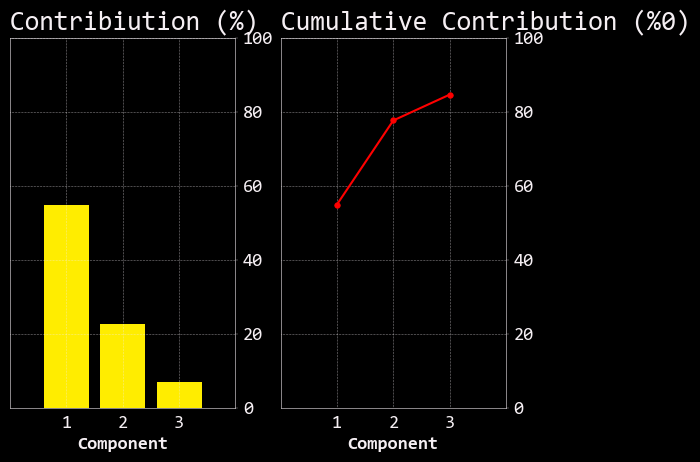

In [13]:
# Visualizes the Components
cum_pct = np.cumsum(pct)
x = np.arange(1, len(pct) + 1, 1)

plt.subplot(1, 2, 1)
plt.bar(x, pct * 100, align = "center")
plt.title('Contribiution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.plot(x, cum_pct * 100, 'ro-')
plt.title('Cumulative Contribution (%0)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100]);


In [ ]:
"""The chart on the left shows the contribution of the top three 
components toward the total variance. 
In other words, these components contribute the most to the information in the data. 
The first component explains 54.9% of the variation in the portfolio returns. 
In stock portfolios, this is usually driven by the overall market movement.

The chart on the right is the cumulative sum of the contribution of each component. 
It shows the top three components explain 84.7% of total portfolio returns. 
There’s no magic cumulative contribution but two or three components 
explaining close to 85% of the contribution is a good result.
"""


In [7]:
"""There are forces that move stock prices that we can’t see. 
These latent factors are picked up through PCA and isolated as the principal components. 
The overall stock market is usually a strong driver of returns. 
Macroeconomic forces like interest rates and the pandemic drive returns, too. 
PCA lets you isolate these statistical factors to get an idea 
of how much the portfolio’s returns come from these unobserved features.

Let’s take a look.
"""

x = np.asarray(portfolio_returns)
factor_returns = x.dot(pca_components.T)
factor_returns = pd.DataFrame(
    columns = ["F1", "F2", "F3"],
    index = portfolio_returns.index,
    data = factor_returns
)
factor_returns.head()

,F1,F2,F3
Date,,,
2020-01-03,-0.011794,0.015824,-0.007090
2020-01-06,0.009480,-0.010078,-0.013161
2020-01-07,-0.006960,0.009891,-0.008298
2020-01-08,-0.074473,-0.031461,-0.002840
2020-01-09,-0.012221,-0.023795,-0.001387


In [10]:
"""First, muliply the portfolio returns by the principle components. T
he dot function makes sure every return is multiplied by each of the components. 
The T function transposes the DataFrame. 
The resulting DataFrame gives you how much of that day’s portfolio return 
is a result of each of the three factors.
Similar stocks will be driven by similar factors. 
PCA makes it easy to visualize this.
"""
factor_exposures = pd.DataFrame(
    index = ["F1", "F2", "F3"],
    columns = portfolio_returns.columns,
    data = pca_components
).T

factor_exposures

,F1,F2,F3
IBM,0.078962,-0.252227,0.440730
MSFT,0.100812,-0.445576,0.047185
META,0.122527,-0.635266,-0.677004
INTC,0.098114,-0.535770,0.506087
NEM,0.322509,0.011944,0.213583
AU,0.549514,0.123059,-0.037253
AEM,0.375946,0.027935,0.128032
GFI,0.641600,0.176532,-0.160233


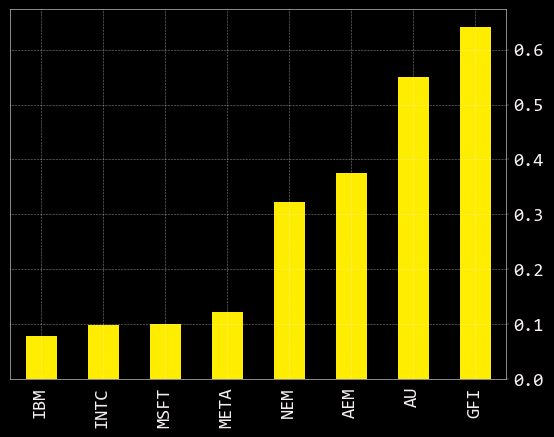

In [12]:
factor_exposures.F1.sort_values().plot.bar();

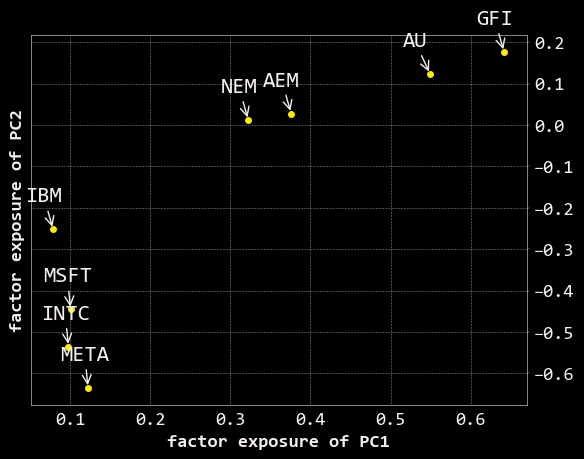

In [19]:
"""Analyze the first component. 
Create a DataFrame with the components, grab the first factor, 
sort stocks by the component, and plot them. 
You can see the tech stocks and the gold stocks clustered together. 
This component is more strongly driving the gold stocks. 
Can you guess what it is? (Hint: What major global event took place 
between January 2020 through November 2022?)
Another great way to visualize this is with a scatter plot.
"""
labels = factor_exposures.index
data = factor_exposures.values
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (-20, 20),
        textcoords = 'offset points',
        arrowprops=dict(arrowstyle = '->', connectionstyle = 'arc3 , rad = 0')
    );